In [1]:
from Bio.PDB import PDBParser, PDBIO, Select
import py3Dmol
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from features import *
import pickle as pkl
import torch
import ipywidgets as widgets
from ipywidgets import HBox
from IPython.display import display, HTML, Javascript

In [2]:
a = aminoacid_score(r'rna_structures\6l8e_K.pdb', r'rna_structures\6l8e_K.txt')
b = mesher(r'rna_structures\6l8e_K.pdb')

FileNotFoundError: [Errno 2] No such file or directory: 'rna_structures\\6l8e_K.txt'

In [6]:
x = mesher(r'rna_structures\6l8e_K.pdb')

c:\Anaconda3\envs\pytorch\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'PARENT' at line 658
  warnings.warn(
c:\Anaconda3\envs\pytorch\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 660
  warnings.warn(


In [52]:
vert = []
atoms = []
chargesarray = []

with open(r'rna_structures\unknown_protein.obj', 'r') as file:
    for line in file:
        parts = line.split()
        if parts[0] == 'v':    
            vert.append([float(parts[1]), float(parts[2]), float(parts[3])])

with open(r'rna_structures\unknown_protein.pqr','r') as file:
    for count,line in enumerate(file):
        parts = line.split()
        try:
            if parts[0] == 'ATOM':
                atoms.append([float(parts[5]), float(parts[6]), float(parts[7])])
                chargesarray.append(float(parts[8]))
        except:
            pass

vert_tensor = torch.Tensor(vert)
atoms_tensor = torch.Tensor(atoms)
charges_tensor = torch.Tensor(chargesarray)
vert_charges = torch.Tensor().new_zeros(size = (len(vert), 0))

n = len(vert)
for i in range(len(atoms)):
    atom = torch.Tensor(atoms[i]).reshape(1,3)*torch.ones(n,3)
    diff = torch.sub(vert_tensor, atom)
    abs_diff = torch.abs(diff)


In [49]:
      diff = tf.subtract(vert, atom)
        abs_diff = tf.abs(diff)
        squared_sum = tf.reduce_sum(abs_diff, axis=1)
        chargeassign = float(charge[i])/squared_sum
        vertcharges.assign_add(chargeassign)

torch.Size([6409, 3])

In [ ]:
    n = len(vert)

    for i in range(len(atoms)):
        atom = tf.constant(atoms[i], shape= (1,3), dtype=tf.float32)*tf.ones([n,1], dtype=tf.float32)

In [3]:
aminoacid_afinity = []
with open(r'rna_structures/6l8e_K.txt', 'r') as aaf:
    for line in aaf:
        part = line.split()
        try:
            float_value = float(part[2])
            aminoacid_afinity.append(float_value)
        except ValueError:
            continue
n_aminoacid_afinity = (aminoacid_afinity - np.min(aminoacid_afinity)) / (np.max(aminoacid_afinity) - np.min(aminoacid_afinity))

In [4]:
cmap = mpl.colormaps.get_cmap('viridis')
colors = [cmap(score) for score in n_aminoacid_afinity]
hex_colors = ["#{:02x}{:02x}{:02x}".format(int(r*255), int(g*255), int(b*255)) for r, g, b, _ in colors]

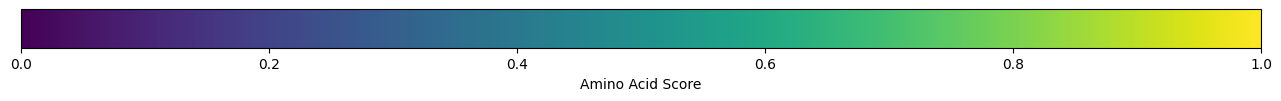

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Output()

In [6]:
def on_button_click(b):
    with output:
        print("Button clicked.")
def on_button_click2(b):
    with output:
        print("Button clicked 2.")
def on_button_click3(b):
    with output:
        print("Button clicked3.")
def on_button_click4(b):
    with output:
        print("Button clicked3.")

fig, ax = plt.subplots(figsize=(16, .5))
fig.subplots_adjust()

cmap = plt.get_cmap('viridis')
norm = plt.Normalize(0, 1)

cb1 = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap),
                   cax=ax, orientation='horizontal', label='Amino Acid Score')

with open(r'rna_structures\6l8e_K.pdb') as ifile:
    system = "".join([x for x in ifile])
view = py3Dmol.view(width=1300, height=600)
view.addModelsAsFrames(system)
for i, color in enumerate(hex_colors):
    view.setStyle({'resi': i+1}, {'cartoon': {'color': color}}) 

button1 = widgets.Button(description="Button 1",layout=widgets.Layout(width='330px', height='50px'))
button2 = widgets.Button(description="Button 2", layout=widgets.Layout(width='330px', height='50px'))
button3 = widgets.Button(description="Button 2", layout=widgets.Layout(width='330px', height='50px'))
button4 = widgets.Button(description="Button 2", layout=widgets.Layout(width='330px', height='50px'))

hbox = HBox([button1, button2, button3, button4], layout=widgets.Layout(width='100%', height='50px'))

display(HTML('<h2>Aptamesh RNA</h2>'))
plt.show()
view.zoomTo()
view.show()
display(HTML('<h2>Please click the button to proceed:</h2>'))
# Attach the function to the button
button1.on_click(on_button_click)
button2.on_click(on_button_click2)
button3.on_click(on_button_click3)
button4.on_click(on_button_click4)
display(hbox)
output = widgets.Output()
display(output)